# Best Tablet in Flipkart

### Importing Required Modules

In [1]:
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

### Web Scraping using Regex

In [2]:
title = []
price = []
ratings = []
rom = []
color = []
pc = []
battery = []
cm = []
wifi = []
for i in range(1,26):
    url = f"https://www.flipkart.com/search?q=tablets&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    request_header = {'Content-Type': 'text/html; charset=UTF-8','User-Agent': 'Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0','Accept-Encoding': 'gzip, deflate, br'}

    page = requests.get(url,headers =request_header)
    soup = BeautifulSoup(page.text)
    
    for i in soup.find_all("div",class_='tUxRFH'):
        
        #title
        Title = i.find('div',class_='KzDlHZ')
        if Title:
            text1 = Title.text
            regex1 = re.findall('\w+',text1)
            if regex1:
                title.append(regex1[0])
            else:
                title.append(np.nan)
                
        # price
        Price = i.find('div',class_='Nx9bqj _4b5DiR')
        if Price:
            text2 = Price.text
            text_replace = text2.replace('₹','').replace(',','')
            price.append(text_replace)
        else:
            price.append(np.nan)
                
        #ratings
        Ratings = i.find('div',class_='XQDdHH')
        if Ratings:
            text3 = Ratings.text
            ratings.append(text3)
        else:
            ratings.append(np.nan)
            
                
        #rom
        Rom = i.find('div',class_='KzDlHZ')
        if Rom:
            text5 = Rom.text
            regex5 = re.findall('(\d+)\sGB ROM',text5)
            if regex5:
                rom.append(regex5[0])
            else:
                rom.append(np.nan)
                
        #color
        Color = i.find('div',class_='KzDlHZ')
        if Color:
            text6 = Color.text
            regex6 = re.findall('\s\(([^\d]\w+\s?\w+)\)',text6)
            if regex6:
                color.append(regex6[0])
            else:
                color.append(np.nan)
                
                
        #pc
        Pc = i.find('div',class_='_6NESgJ')
        if Pc:
            text8 = Pc.text
            regex8 = re.findall('Display(\d.+|\d+) MP Primary Camera',text8)
            if regex8:
                pc.append(regex8[0])
            else:
                pc.append(np.nan)
                
        #battery
        Battery = i.find('div',class_='_6NESgJ')
        if Battery:
            text10 = Battery.text
            regex10 = re.findall('Battery:\s(\d+)\s\w+',text10)
            if regex10:
                battery.append(regex10[0])
            else:
                battery.append(np.nan)
                
                
        #cm
        Cm = i.find('div',class_='_6NESgJ')
        if Cm:
            text12 = Cm.text
            regex12 = re.findall('(\d+\.\d+\s)cm',text12)
            if regex12:
                cm.append(regex12[0])
            else:
                cm.append(np.nan)
                
                                 
        #wifi        
        Wifi = i.find('div',class_='KzDlHZ')
        if Wifi:
            text13 = Wifi.text
            regex13 = re.findall('with\s(\w+-\w+\+?\w+)\s',text13)
            if regex13:
                wifi.append(regex13[0])
            else:
                wifi.append(np.nan)

In [3]:
len(price)

600

In [4]:
dict1 = {'Brand':title,'Storage':rom,"Color":color,'Display_Cm':cm,
         'Primary_Camera':pc,'Wifi':wifi,'Ratings':ratings,'Price':price}

### Creating DataFrame

In [5]:
Tab = pd.DataFrame(dict1)
Tab

,Brand,Storage,Color,Display_Cm,Primary_Camera,Wifi,Ratings,Price
0,REDMI,128,Graphite Gray,26.95,8.0,Wi-Fi,4.4,10999
1,SAMSUNG,128,Silver,27.94,8,Wi-Fi,4.5,19999
2,Xiaomi,128,Graphite grey,27.94,13.0,Wi-Fi,4.6,24999
3,LAVA,32,Grey,25.65,5.0,Wi-Fi+4G,3.8,7124
4,Xiaomi,256,Mist Blue,27.94,13,Wi-Fi,4.6,26999
...,...,...,...,...,...,...,...,...
595,Alcatel,32,Metallic Black,20.32,8,Wi-Fi+4G,4,9999
596,SAMSUNG,128,Silver,31.5,13,Wi-Fi+5G,4.7,83999
597,SAMSUNG,32,Silver,25.4,8.0,Wi-Fi+4G,4.4,19999
598,Apple,32,Gold,24.64,8.0,Wi-Fi,4.6,28000


# EDA Process

In [6]:
Tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Brand           600 non-null    object
 1   Storage         534 non-null    object
 2   Color           576 non-null    object
 3   Display_Cm      600 non-null    object
 4   Primary_Camera  600 non-null    object
 5   Wifi            580 non-null    object
 6   Ratings         593 non-null    object
 7   Price           597 non-null    object
dtypes: object(8)
memory usage: 37.6+ KB


In [7]:
Tab.isna().sum()

Brand              0
Storage           66
Color             24
Display_Cm         0
Primary_Camera     0
Wifi              20
Ratings            7
Price              3
dtype: int64

### Manipulating Duplicate Values

In [8]:
Tab["Brand"] = Tab['Brand'].str.title()

In [9]:
Tab['Brand'].unique()

array(['Redmi', 'Samsung', 'Xiaomi', 'Lava', 'Realme', 'Lenovo',
       'Oneplus', 'Nokia', 'Motorola', 'Apple', 'Acer', 'Oppo', 'Honor',
       'Swipe', 'Iball', 'Itel', 'Baatu', 'I', 'Oukitel', 'Wishtel',
       'Cornea', 'Hp', 'Alcatel'], dtype=object)

In [10]:
Tab['Brand'] = Tab['Brand'].replace('I','Apple')

In [11]:
Tab['Brand'].unique()

array(['Redmi', 'Samsung', 'Xiaomi', 'Lava', 'Realme', 'Lenovo',
       'Oneplus', 'Nokia', 'Motorola', 'Apple', 'Acer', 'Oppo', 'Honor',
       'Swipe', 'Iball', 'Itel', 'Baatu', 'Oukitel', 'Wishtel', 'Cornea',
       'Hp', 'Alcatel'], dtype=object)

### Filling Null Values

In [13]:
Tab.dropna(subset=['Price'],inplace=True)

In [14]:
Tab.isna().sum()

Brand              0
Storage           66
Color             24
Display_Cm         0
Primary_Camera     0
Wifi              20
Ratings            7
Price              0
dtype: int64

### Filling Storage column null values

In [15]:
Tab[Tab['Storage'].isna()]

,Brand,Storage,Color,Display_Cm,Primary_Camera,Wifi,Ratings,Price
55,Apple,NaN,Silver,27.94,12,Wi-Fi,4.7,117099
57,Apple,NaN,Silver,27.94,12,Wi-Fi+5G,4.7,127299
61,Apple,NaN,Space Grey,27.94,12,Wi-Fi+5G,4.7,146499
64,Apple,NaN,Silver,27.94,12,Wi-Fi+5G,4.7,146499
69,Apple,NaN,Space Grey,27.94,12,Wi-Fi,4.7,136899
...,...,...,...,...,...,...,...,...
526,Apple,NaN,NaN,24.64,12.0,NaN,4.5,61900
544,Hp,NaN,NaN,17.78,5,NaN,3.8,16136
552,Apple,NaN,NaN,24.64,8.0,NaN,4.6,41900
557,Apple,NaN,NaN,24.64,12.0,NaN,4.5,61900


In [16]:
Tab['Price'] = Tab['Price'].astype('int')

In [17]:
Tab['Price'].sort_values()

379      3999
383      3999
384      4699
378      4988
272      5985
        ...  
364    239900
362    239900
338    249900
355    249900
335    259900
Name: Price, Length: 597, dtype: int32

In [18]:
Tab[(Tab['Price']>=4000) & (Tab['Price'])<=10000]

,Brand,Storage,Color,Display_Cm,Primary_Camera,Wifi,Ratings,Price
0,Redmi,128,Graphite Gray,26.95,8.0,Wi-Fi,4.4,10999
1,Samsung,128,Silver,27.94,8,Wi-Fi,4.5,19999
2,Xiaomi,128,Graphite grey,27.94,13.0,Wi-Fi,4.6,24999
3,Lava,32,Grey,25.65,5.0,Wi-Fi+4G,3.8,7124
4,Xiaomi,256,Mist Blue,27.94,13,Wi-Fi,4.6,26999
...,...,...,...,...,...,...,...,...
595,Alcatel,32,Metallic Black,20.32,8,Wi-Fi+4G,4,9999
596,Samsung,128,Silver,31.5,13,Wi-Fi+5G,4.7,83999
597,Samsung,32,Silver,25.4,8.0,Wi-Fi+4G,4.4,19999
598,Apple,32,Gold,24.64,8.0,Wi-Fi,4.6,28000


In [19]:
grouping1 = Tab.groupby(by=['Brand','Storage'])[['Price']].mean()
grouping1

Price
Brand    Storage               
Acer     32        11890.000000
         64        12990.000000
Alcatel  32        12799.000000
Apple    128       67959.962264
         16         3999.000000
         256       77899.797619
         32        32416.000000
         512      111003.897436
         64        49995.766667
         8          5599.000000
Baatu    64        12999.000000
Cornea   32        14999.000000
         64        16199.000000
Honor    128       19999.000000
Iball    16         7054.000000
         32        10920.500000
         64        24990.000000
         8          3999.000000
Itel     128       10299.000000
Lava     32         6056.000000
Lenovo   128       17522.255814
         16        13558.250000
         256       29908.090909
         32        10749.000000
         64        13465.666667
Motorola 128       18999.000000
         64        16996.000000
Nokia    32        11465.666667
         64        16247.200000
Oneplus  128       28499.000000
         256       30999.000000
Oppo     128       14999.000000
         64        14999.000000
Oukitel  64        23500.000000
Realme   128       17141.857143
         256       22999.000000
         32        13999.000000
         64        16665.666667
Redmi    128       14589.888889
         64        11999.000000
Samsung  128       51692.731707
         16        17894.500000
         256       79589.909091
         32        20078.000000
         512      119999.000000
         64        24722.517241
Swipe    16         8899.000000
         32         8199.000000
         64        10999.000000
Wishtel  128       20099.000000
         32        12799.000000
         64        14174.000000
Xiaomi   128       24999.000000
         256       26999.000000

In [20]:
Tab['Storage'] = np.where((Tab['Price'] >= 3000) & (Tab['Price'] <= 29999),16,Tab['Storage'])
Tab['Storage'] = np.where((Tab['Price'] >= 30000) & (Tab['Price'] <= 59999),32,Tab['Storage'])
Tab['Storage'] = np.where((Tab['Price'] >= 50000) & (Tab['Price'] <= 69999),64,Tab['Storage'])
Tab['Storage'] = np.where((Tab['Price'] >= 60000) & (Tab['Price'] <= 79999),128,Tab['Storage'])
Tab['Storage'] = np.where((Tab['Price'] >= 70000) & (Tab['Price'] <= 199999),128,Tab['Storage'])
Tab['Storage'] = np.where((Tab['Price'] >= 200000) & (Tab['Price'] <= 399999),256,Tab['Storage'])

In [21]:
Tab['Storage'].isna().sum()

0

### Filling Color Colomn Na values

In [22]:
Tab['Color'] = Tab['Color'].str.title()

In [23]:
Tab['Color'].mode()

0    Silver
Name: Color, dtype: object

In [27]:
Tab['Color'] = Tab['Color'].replace(np.nan,"'Silver'")

In [28]:
Tab['Color'].isna().sum()

0

### Filling Wifi Null Values 

In [29]:
Tab['Wifi'] = Tab['Wifi'].replace(np.nan,'No Wifi')

In [30]:
Tab['Wifi'].isna().sum()

0

### Filling Ratings null values 

In [31]:
Tab['Ratings'] = Tab['Ratings'].replace(np.nan,0)

In [32]:
Tab.isna().sum()

Brand             0
Storage           0
Color             0
Display_Cm        0
Primary_Camera    0
Wifi              0
Ratings           0
Price             0
dtype: int64

In [33]:
Tab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Brand           597 non-null    object
 1   Storage         597 non-null    object
 2   Color           597 non-null    object
 3   Display_Cm      597 non-null    object
 4   Primary_Camera  597 non-null    object
 5   Wifi            597 non-null    object
 6   Ratings         597 non-null    object
 7   Price           597 non-null    int32 
dtypes: int32(1), object(7)
memory usage: 39.6+ KB


### Changing Datatypes

In [34]:
Tab['Storage'] = Tab['Storage'].astype('int')
Tab['Primary_Camera'] = Tab['Primary_Camera'].astype('float')
Tab['Ratings'] = Tab['Ratings'].astype('float')

## Visualization

<Axes: >

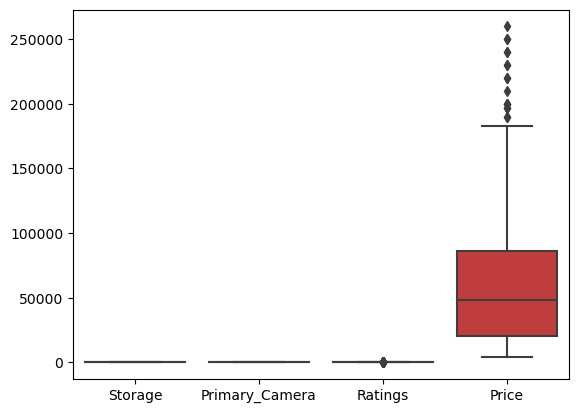

In [35]:
sea.boxplot(Tab)

### Bar plots

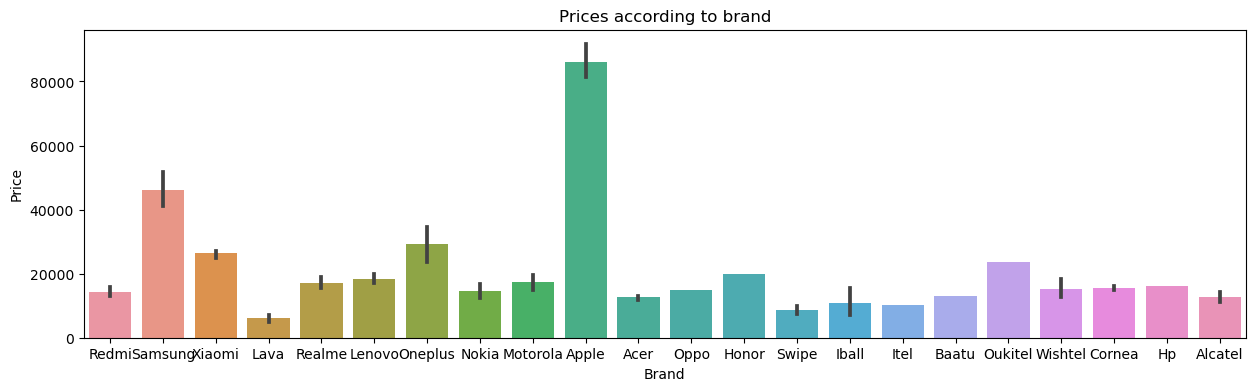

In [36]:
plt.figure(figsize=(15,4))
sea.barplot(data=Tab,x='Brand',y='Price')
plt.title('Prices according to brand')
plt.show()

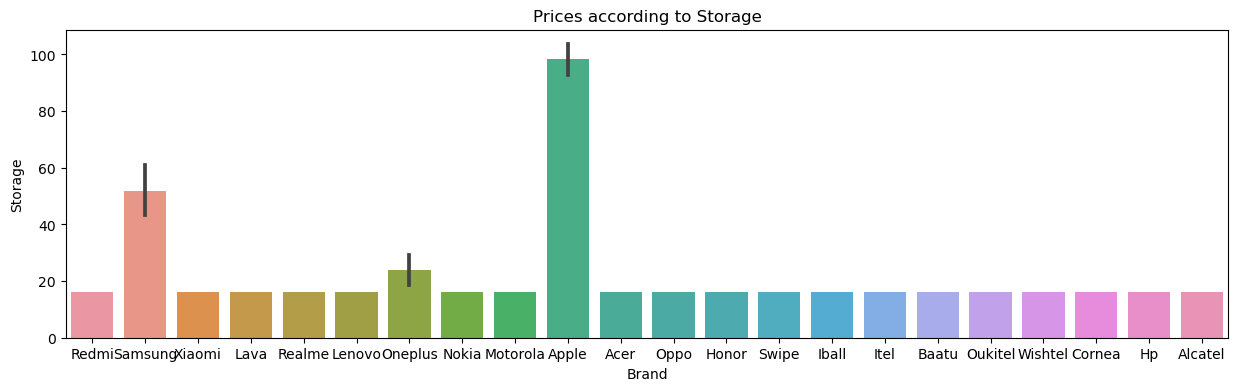

In [37]:
plt.figure(figsize=(15,4))
sea.barplot(data=Tab,x='Brand',y='Storage')
plt.title('Prices according to Storage')
plt.show()

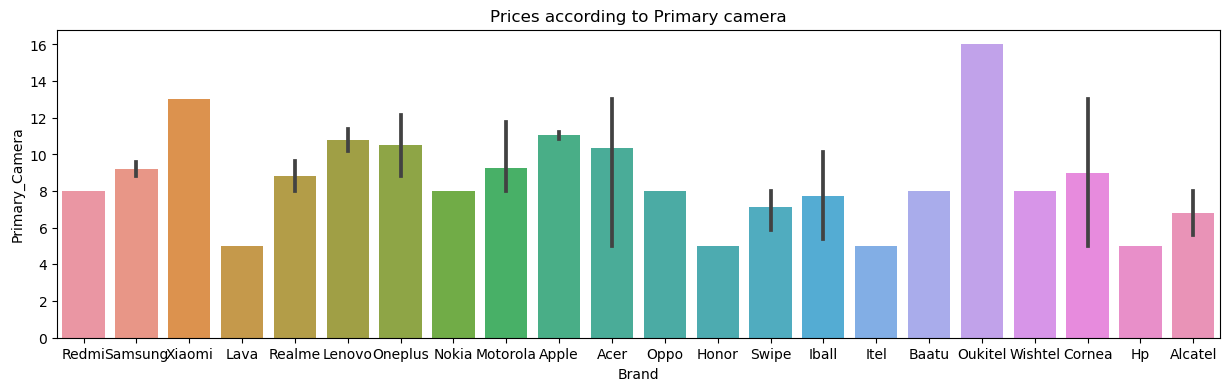

In [38]:
plt.figure(figsize=(15,4))
sea.barplot(data=Tab,x='Brand',y='Primary_Camera')
plt.title('Prices according to Primary camera')
plt.show()

### line plot

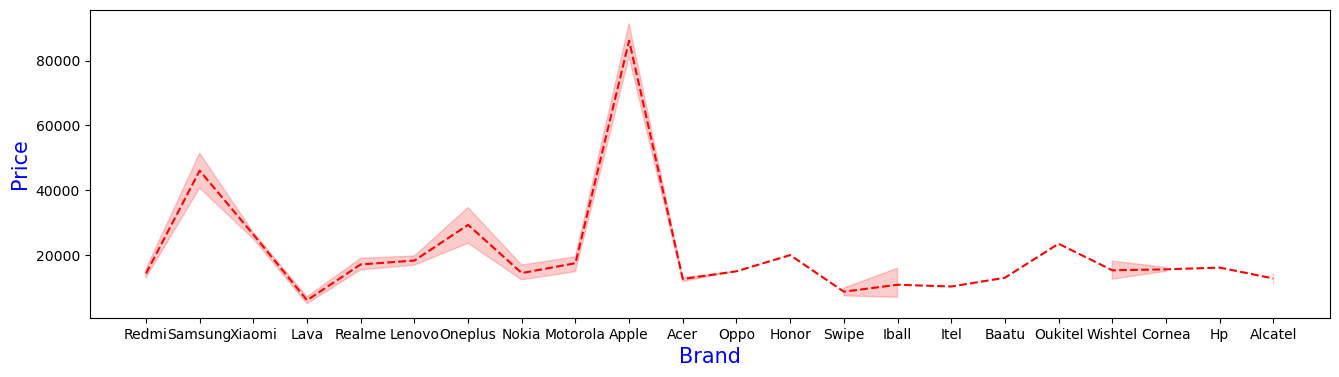

In [49]:
plt.figure(figsize=(16,4))

sea.lineplot(x=Tab['Brand'],y=Tab['Price'],color='r',linestyle='--')
plt.xlabel('Brand',color='b',size=(15))
plt.ylabel('Price',color='b',size=(15))

plt.show()

### Pair plot

C:\Users\kaval\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


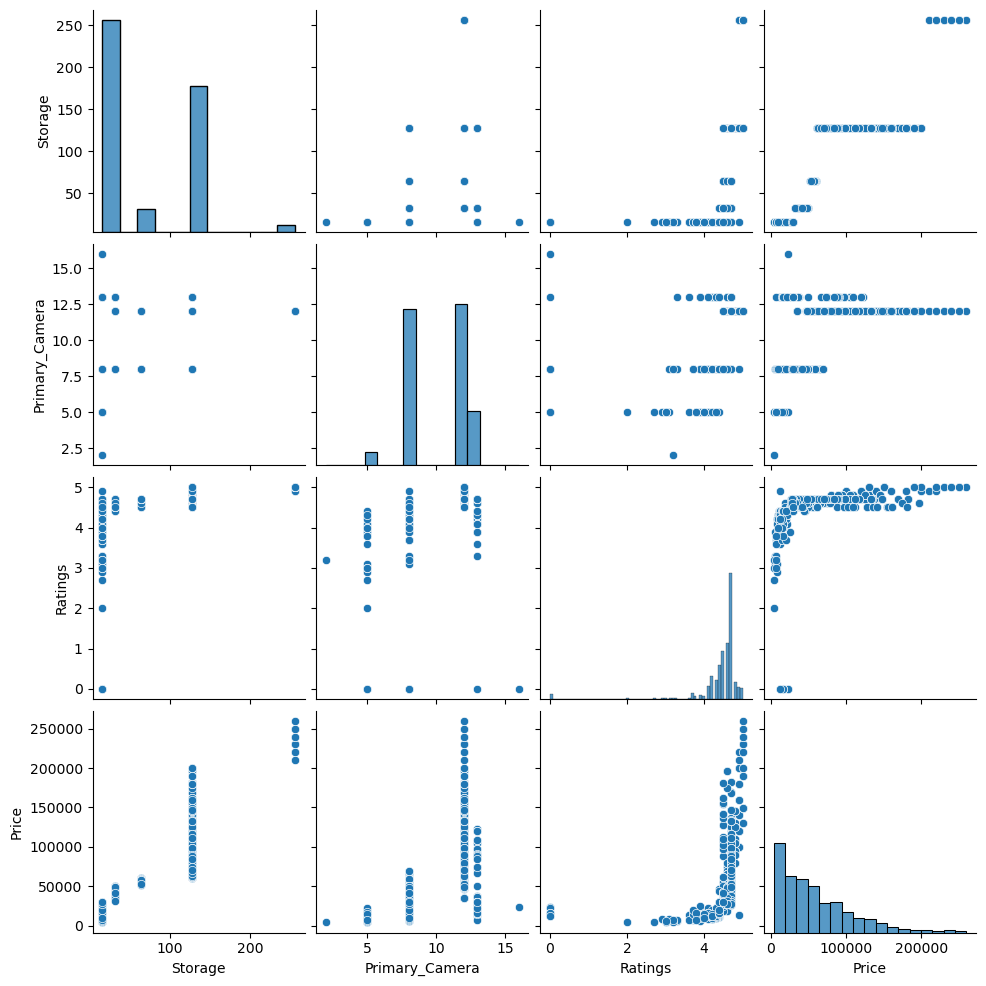

In [62]:
sea.pairplot(Tab)

### Heatmap

In [65]:
new_df = Tab[['Storage','Primary_Camera','Ratings','Price']]

In [67]:
corr = new_df.corr()
corr

,Storage,Primary_Camera,Ratings,Price
Storage,1.000000,0.587239,0.411298,0.884725
Primary_Camera,0.587239,1.000000,0.311373,0.533744
Ratings,0.411298,0.311373,1.000000,0.421726
Price,0.884725,0.533744,0.421726,1.000000


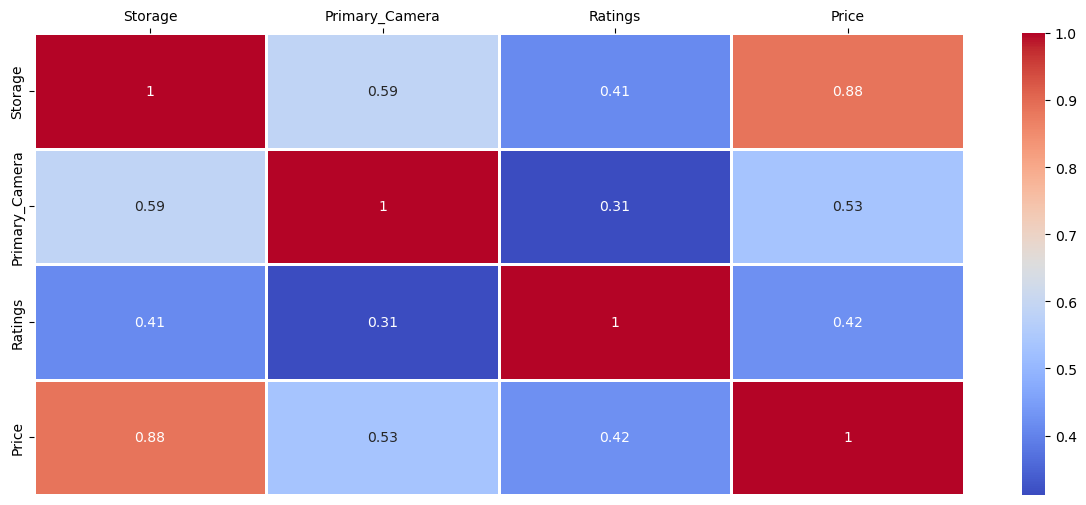

In [74]:
plt.figure(figsize=(15,6))

hm = sea.heatmap(corr,annot=True,linewidth=0.9,cmap='coolwarm')

hm.xaxis.tick_top()


### Scatter plot

<Axes: xlabel='Storage', ylabel='Price'>

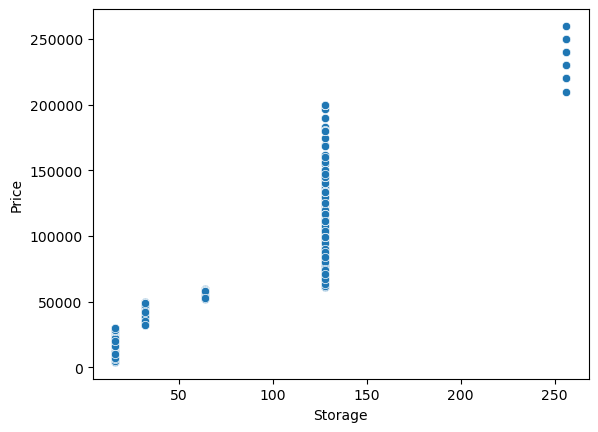

In [91]:
sea.scatterplot(Tab,x='Storage',y='Price')

### Pieplot

In [101]:
df1 = Tab.groupby('Brand')[['Price']].sum()

df1

,Price
Brand,
Acer,37870
Alcatel,63995
Apple,28093581
Baatu,12999
Cornea,31198
Honor,19999
Hp,16136
Iball,86779
Itel,10299


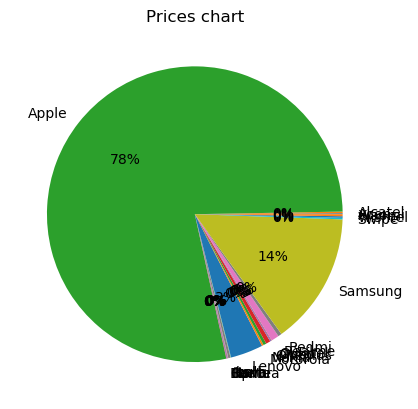

In [129]:
plt.pie(df1['Price'],labels=df1.index,autopct='%0.1i%%')# i%% for integer

plt.title('Prices chart')

plt.show()